<a href="https://www.kaggle.com/code/shreeyashah/churn-prediction-using-ann?scriptVersionId=286886193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [76]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [77]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df.shape

(10000, 14)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [82]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [83]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [84]:
df.drop(columns = ['RowNumber', 'CustomerId' ,'Surname'], inplace=True)

In [85]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [86]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [87]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [88]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [89]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [90]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [99]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8696 - loss: 0.3151 - val_accuracy: 0.8594 - val_loss: 0.3458
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3223 - val_accuracy: 0.8600 - val_loss: 0.3430
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8652 - loss: 0.3220 - val_accuracy: 0.8625 - val_loss: 0.3412
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.3062 - val_accuracy: 0.8606 - val_loss: 0.3433
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8712 - loss: 0.3104 - val_accuracy: 0.8594 - val_loss: 0.3420
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.3178 - val_accuracy: 0.8612 - val_loss: 0.3429
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.3154 - val_accuracy: 0.8619 - val_loss: 0.3417
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3213 - val_accu

In [100]:
model.layers[0].get_weights()

[array([[ 1.26132950e-01,  1.05580956e-01,  4.86765020e-02,
          1.18974783e-01, -1.74810663e-01, -8.77570629e-01,
         -2.98424721e-01, -2.70300880e-02,  7.53674954e-02,
          5.85221872e-02,  5.05531067e-03],
        [-7.72450641e-02, -3.43623787e-01,  2.39316583e-01,
         -9.93929029e-01,  3.83870780e-01, -3.30977947e-01,
         -5.16809702e-01, -1.04391766e+00, -2.78715521e-01,
          7.36121647e-03, -6.86886758e-02],
        [ 3.69755477e-02,  3.64208072e-01,  8.85535628e-02,
         -9.77071282e-03, -4.05441895e-02, -2.78952241e-01,
         -2.01782703e-01,  1.47733495e-01, -4.84466888e-02,
         -4.30971235e-02, -2.36488506e-02],
        [-3.65619034e-01, -1.18283860e-01, -6.78249121e-01,
         -4.52471636e-02, -4.44017559e-01, -6.62446320e-01,
         -8.07830468e-02, -9.71368849e-01, -5.59713244e-01,
         -9.86774623e-01, -1.52199522e-01],
        [ 9.68283713e-01,  3.83974403e-01, -4.88332100e-03,
          1.42832901e-02, -1.63845286e-01, -

In [101]:
model.layers[1].get_weights()

[array([[-4.10261840e-01,  5.43621540e-01,  6.22195303e-01,
         -5.81473947e-01, -2.39393041e-01, -2.08130956e-01,
          3.43634814e-01, -4.93455887e-01,  4.06089127e-01,
          3.00491929e-01,  1.69813469e-01],
        [ 3.31765056e-01,  4.96665686e-01,  9.71921533e-02,
         -2.58170992e-01,  5.37425466e-02, -7.66507015e-02,
          8.34447086e-01,  5.10867953e-01,  2.98074126e-01,
         -1.27549216e-01,  2.04365209e-01],
        [-1.53146293e-02,  1.73642352e-01,  4.00083065e-01,
         -5.41453540e-01, -9.65695322e-01,  4.01385635e-01,
         -4.47477074e-03,  6.12745345e-01, -3.74709129e-01,
         -5.32038748e-01,  4.20330577e-02],
        [ 2.20558971e-01, -5.20959675e-01, -2.64785856e-01,
          6.05068445e-01,  4.85553622e-01,  8.63396049e-01,
         -3.29699248e-01,  8.59272897e-01, -5.30720890e-01,
          1.35851547e-01, -1.05419636e+00],
        [-7.41762519e-02, -1.19582824e-01, -3.60488206e-01,
         -1.18291688e+00,  2.38517951e-02,  

In [102]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [103]:
y_pred = np.where(y_log>0.5, 1, 0)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.866

In [108]:
history.history

{'accuracy': [0.8678125143051147,
  0.8687499761581421,
  0.8685937523841858,
  0.8693749904632568,
  0.867968738079071,
  0.8696874976158142,
  0.8689062595367432,
  0.8682812452316284,
  0.8696874976158142,
  0.8685937523841858,
  0.8681250214576721,
  0.8687499761581421,
  0.8696874976158142,
  0.8676562309265137,
  0.867968738079071,
  0.8692187666893005,
  0.8700000047683716,
  0.8706250190734863,
  0.8709375262260437,
  0.8695312738418579,
  0.8681250214576721,
  0.8681250214576721,
  0.8689062595367432,
  0.8695312738418579,
  0.8678125143051147,
  0.8685937523841858,
  0.8685937523841858,
  0.8698437213897705,
  0.8675000071525574,
  0.8689062595367432,
  0.8695312738418579,
  0.8692187666893005,
  0.8685937523841858,
  0.8700000047683716,
  0.8678125143051147,
  0.8678125143051147,
  0.8690624833106995,
  0.8687499761581421,
  0.8682812452316284,
  0.8685937523841858,
  0.8682812452316284,
  0.867968738079071,
  0.8692187666893005,
  0.8667187690734863,
  0.8692187666893005,
 

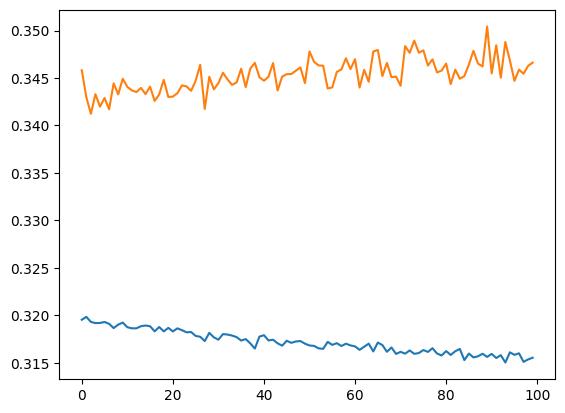

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

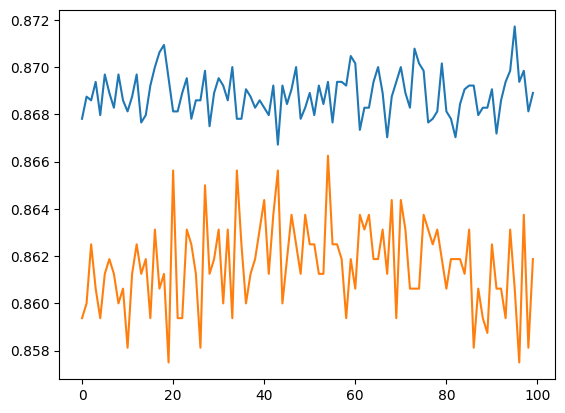

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])